In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df = pd.read_pickle('final_features')
df.head(5)

,Year,citymarketid_1,citymarketid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low,...,city1_region_Midwest,city1_region_Northeast,city1_region_Other,city1_region_South,city1_region_West,city2_region_Midwest,city2_region_Northeast,city2_region_Other,city2_region_South,city2_region_West
0,28,30135,33195,970,180,81.43,1.0000,81.43,1.0000,81.43,...,False,True,False,False,False,False,False,False,True,False
1,28,30135,33195,970,19,208.93,0.4659,219.98,0.1193,154.11,...,False,True,False,False,False,False,False,False,True,False
2,28,30140,30194,580,204,184.56,0.9968,184.44,0.9968,184.44,...,False,False,False,False,True,False,False,False,True,False
3,28,30140,30194,580,264,182.64,0.9774,183.09,0.9774,183.09,...,False,False,False,False,True,False,False,False,True,False
4,28,30140,30466,328,398,177.11,0.6061,184.49,0.3939,165.77,...,False,False,False,False,True,False,False,False,False,True


In [9]:
# Correlation with the target variable
corr_with_target = df.corr()['fare'].abs().sort_values(ascending=False)
relevant_features = corr_with_target[corr_with_target > 0.3].index
correlation_matrix = df[relevant_features].corr()


In [10]:
correlation_matrix

,fare,fare_lg,fare_low,nsmiles,city_distance,fare_diff_lg_low,airportid_2_encoded,nmiles/popularity1,fare_low_lf_ms_interaction,airportid_1_encoded
fare,1.000000,0.956197,0.874653,0.512181,0.500012,0.348722,0.329437,0.316932,0.310043,0.308635
fare_lg,0.956197,1.000000,0.828050,0.483501,0.471791,0.498691,0.307001,0.303591,0.246120,0.286875
fare_low,0.874653,0.828050,1.000000,0.416711,0.407585,-0.073023,0.302937,0.247776,0.552283,0.294867
nsmiles,0.512181,0.483501,0.416711,1.000000,0.974669,0.215843,0.216040,0.455545,-0.021263,0.176277
city_distance,0.500012,0.471791,0.407585,0.974669,1.000000,0.209122,0.206415,0.429991,-0.017367,0.170635
fare_diff_lg_low,0.348722,0.498691,-0.073023,0.215843,0.209122,1.000000,0.077769,0.156983,-0.416023,0.054444
airportid_2_encoded,0.329437,0.307001,0.302937,0.216040,0.206415,0.077769,1.000000,0.297035,0.115992,0.036392
nmiles/popularity1,0.316932,0.303591,0.247776,0.455545,0.429991,0.156983,0.297035,1.000000,0.014272,0.052689
fare_low_lf_ms_interaction,0.310043,0.246120,0.552283,-0.021263,-0.017367,-0.416023,0.115992,0.014272,1.000000,0.129445
airportid_1_encoded,0.308635,0.286875,0.294867,0.176277,0.170635,0.054444,0.036392,0.052689,0.129445,1.000000


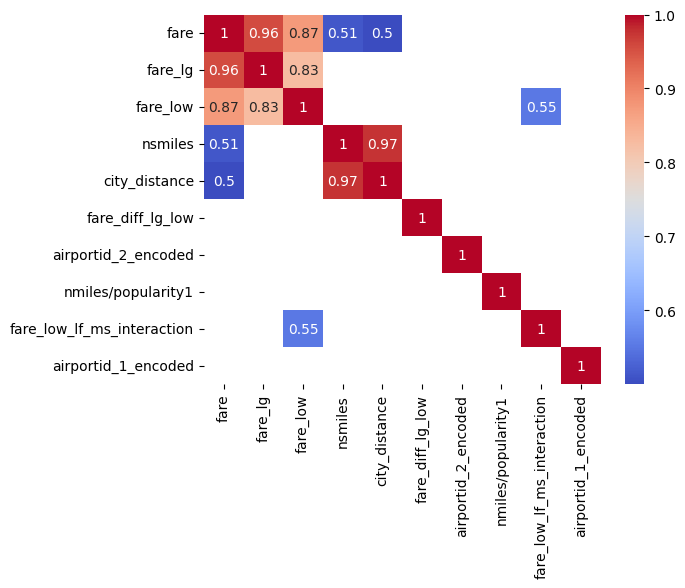

In [11]:
threshold = 0.5
mask = correlation_matrix.abs() < threshold

# Apply mask to the correlation matrix
correlation_matrix[mask] = None

# Plot the filtered heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.show()

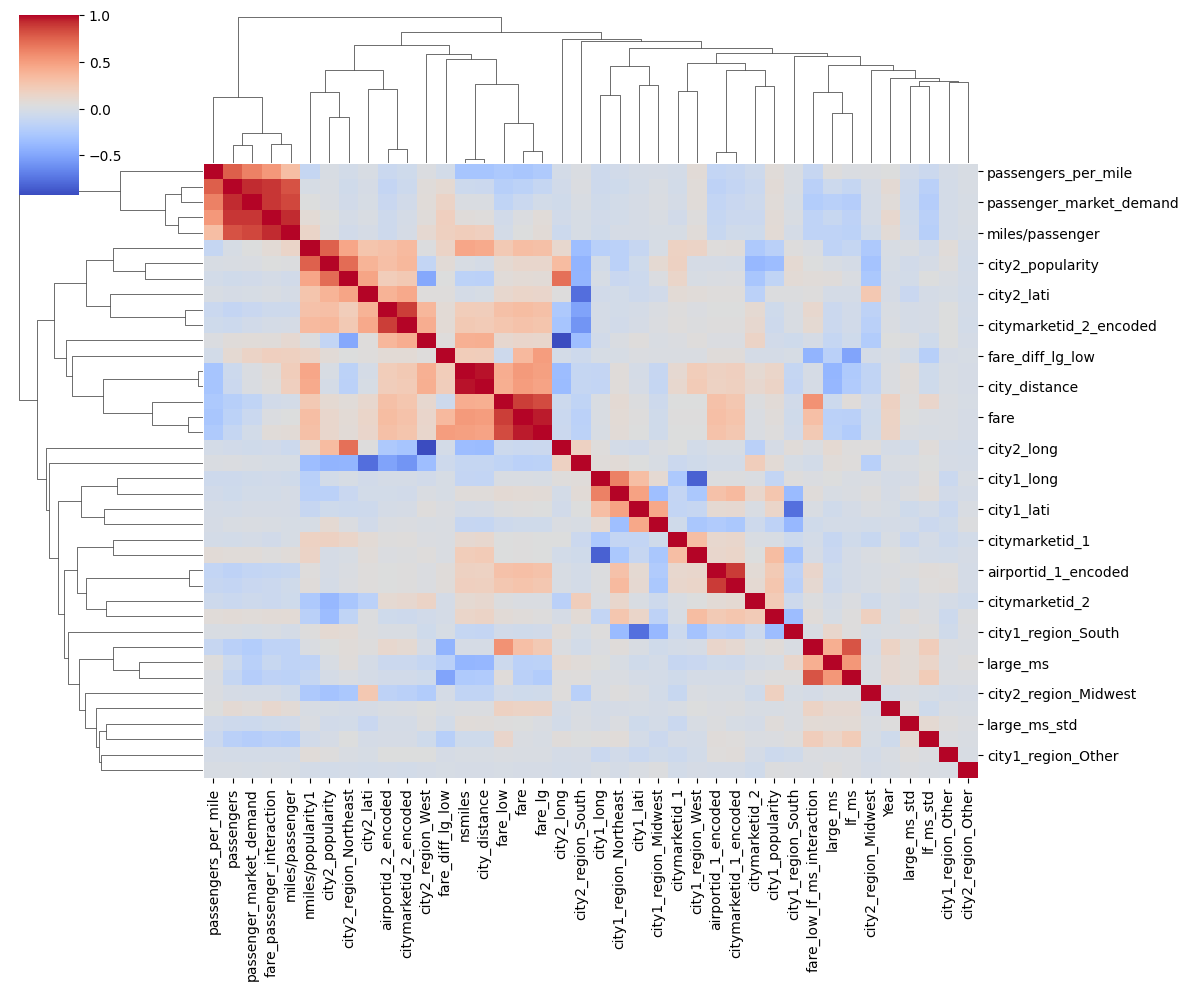

In [14]:
correlation_matrix = df.corr()
# Plot the clustermap
sns.clustermap(correlation_matrix, cmap='coolwarm', figsize=(12, 10))
plt.show()